Importing Modules

In [227]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")


In [228]:
df1 = pd.read_csv("train.csv")
df1.to_csv("train.csv", index=False)
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Data Cleaning & Exploratory Data Analysis

In [229]:
df1.info()

print(list(df1.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [230]:
# Calculating total nulls and the percentage
null_summary = pd.DataFrame({
    'Total Nulls': df1.isnull().sum(),
    'Percentage (%)': (df1.isnull().sum() / len(df1) * 100).round(2)
})

#  Sorting by percentage to see the biggest problems first
print(null_summary.sort_values(by='Percentage (%)', ascending=False))

             Total Nulls  Percentage (%)
Cabin                687           77.10
Age                  177           19.87
Embarked               2            0.22
PassengerId            0            0.00
Name                   0            0.00
Pclass                 0            0.00
Survived               0            0.00
Sex                    0            0.00
Parch                  0            0.00
SibSp                  0            0.00
Fare                   0            0.00
Ticket                 0            0.00


In [231]:
# I create a new column 'HasCabin' to indicate whether a passenger has a cabin or not.
# If 'Cabin' is not null, I mark it as 1, else 0.
# I fill missing 'Age' values with the median age of passengers grouped by 'Pclass' and 'Sex'.
# This ensures that the filled age is realistic for the passenger's class and gender.

df1['HasCabin'] = df1['Cabin'].notna().astype(int)
df1.drop(columns = ['Cabin'],inplace = True)
df1 = df1.dropna(subset = ['Embarked'])
df1['Age'] = df1.groupby(['Pclass','Sex'])['Age'] \
    .transform(lambda x: x.fillna(x.median()))
num_blank = df1[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'HasCabin', 'Embarked']].isna().sum()
print(num_blank)
df1.head()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
HasCabin       0
Embarked       0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [232]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,HasCabin
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.065433,0.524184,0.382452,32.096681,0.227222
std,256.998173,0.486260,0.834700,13.270162,1.103705,0.806761,49.697504,0.419273
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,21.500000,0.000000,0.000000,7.895800,0.000000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000
75%,668.000000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


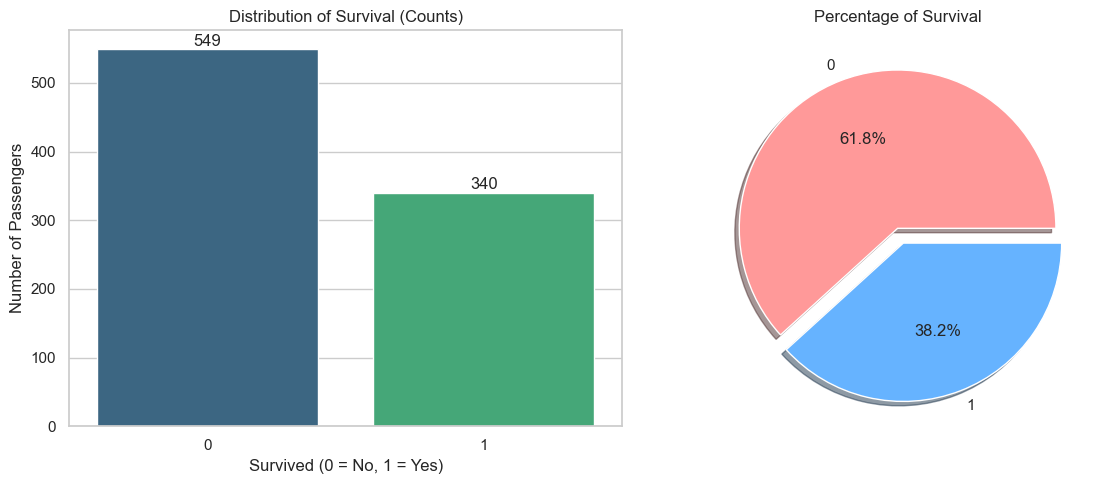

In [233]:
# Set the visual style
sns.set_theme(style="whitegrid")

# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# 1. Count Plot (Shows the raw numbers)
plt.subplot(1, 2, 1)
ax = sns.countplot(x='Survived', data=df1, palette='viridis')
plt.title('Distribution of Survival (Counts)')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Number of Passengers')

# Adding labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + 0.35, p.get_height() + 5))

# 2. Pie Chart (Shows the percentage)
plt.subplot(1, 2, 2)
df1['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=['#ff9999','#66b3ff'])
plt.title('Percentage of Survival')
plt.ylabel('') # Removes the vertical 'Survived' label

plt.tight_layout()
plt.show()

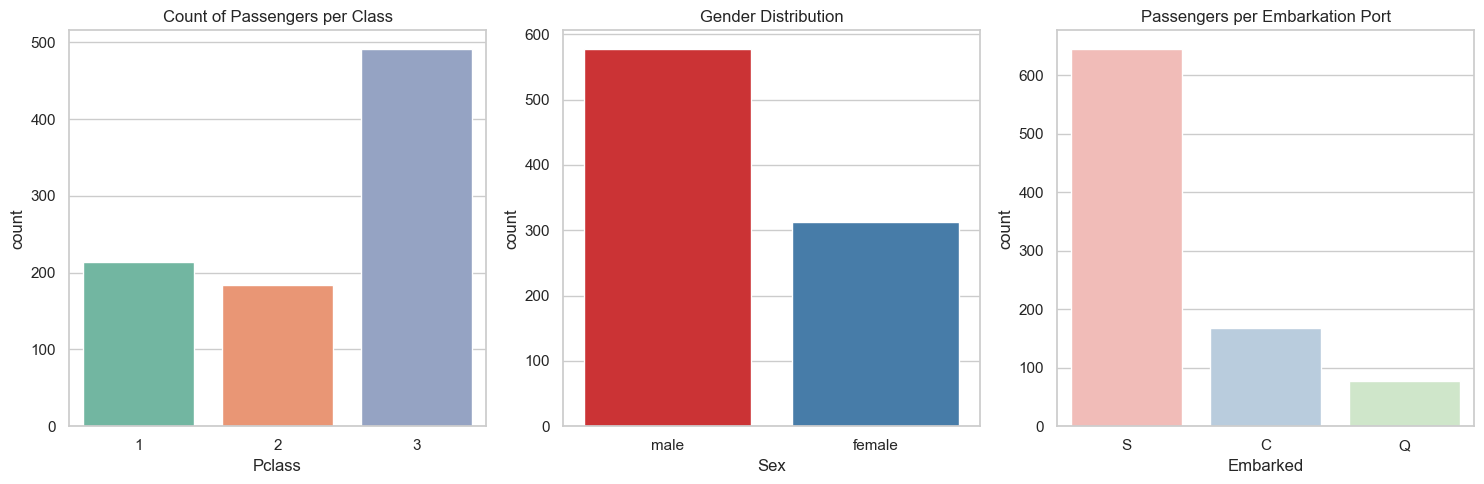

Pclass counts:
 Pclass
3    491
1    214
2    184
Name: count, dtype: int64

Sex counts:
 Sex
male      577
female    312
Name: count, dtype: int64


In [234]:
# Creating a grid for Multiple Plots
plt.figure(figsize=(15, 5))

# Plot 1: Passenger Class
plt.subplot(1, 3, 1)
sns.countplot(x='Pclass', data=df1, palette='Set2')
plt.title('Count of Passengers per Class')

# Plot 2: Sex
plt.subplot(1, 3, 2)
sns.countplot(x='Sex', data=df1, palette='Set1')
plt.title('Gender Distribution')

# Plot 3: Embarked (Port of Departure)
plt.subplot(1, 3, 3)
sns.countplot(x='Embarked', data=df1, palette='Pastel1')
plt.title('Passengers per Embarkation Port')

plt.tight_layout()
plt.show()

# Printing  the exact numbers
print("Pclass counts:\n", df1['Pclass'].value_counts())
print("\nSex counts:\n", df1['Sex'].value_counts())

<Axes: >

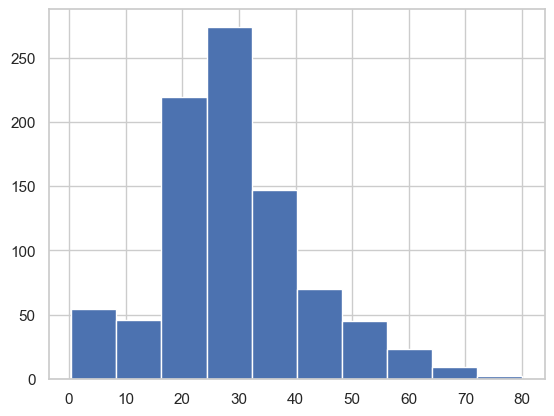

In [235]:
df1['Age'].hist()

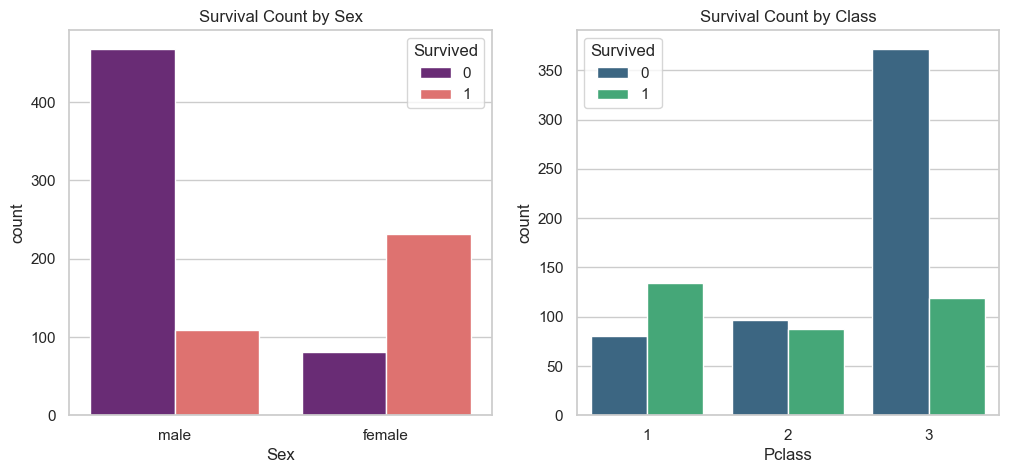

In [236]:
plt.figure(figsize=(12, 5))

# Survival by Sex
plt.subplot(1, 2, 1)
sns.countplot(x='Sex', hue='Survived', data=df1, palette='magma')
plt.title('Survival Count by Sex')

# Survival by Passenger Class
plt.subplot(1, 2, 2)
sns.countplot(x='Pclass', hue='Survived', data=df1, palette='viridis')
plt.title('Survival Count by Class')

plt.show()

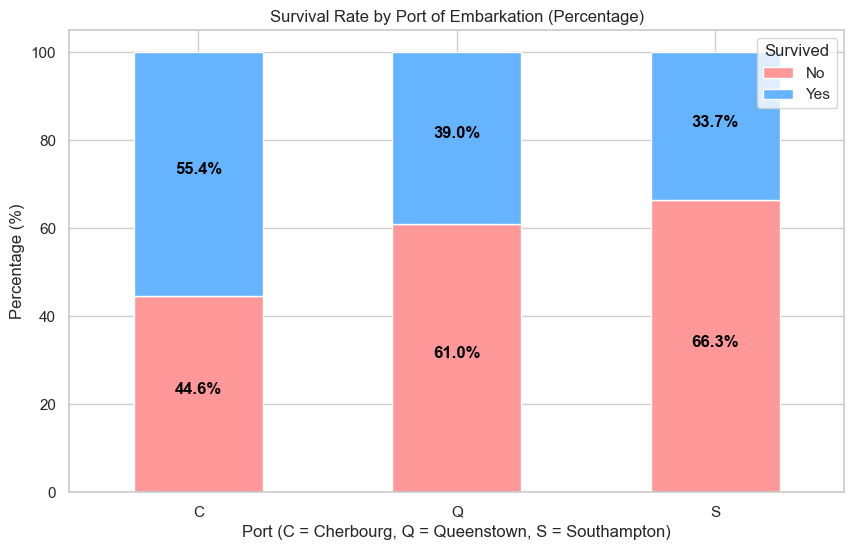

In [237]:
# Calculating the percentage of survival for each port
survival_by_port = pd.crosstab(df1['Embarked'], df1['Survived'], normalize='index') * 100

# Plotting the crosstab
ax = survival_by_port.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ff9999','#66b3ff'])

plt.title('Survival Rate by Port of Embarkation (Percentage)')
plt.xlabel('Port (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Percentage (%)')
plt.legend(title='Survived', labels=['No', 'Yes'], loc='upper right')
plt.xticks(rotation=0)

# Adding the percentage labels on the bars for clarity
for n, x in enumerate([*survival_by_port.index.values]):
    for (proportion, y_loc) in zip(survival_by_port.loc[x],
                                   survival_by_port.loc[x].cumsum()):
                
        plt.text(x=n,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold",
                 ha="center")

plt.show()

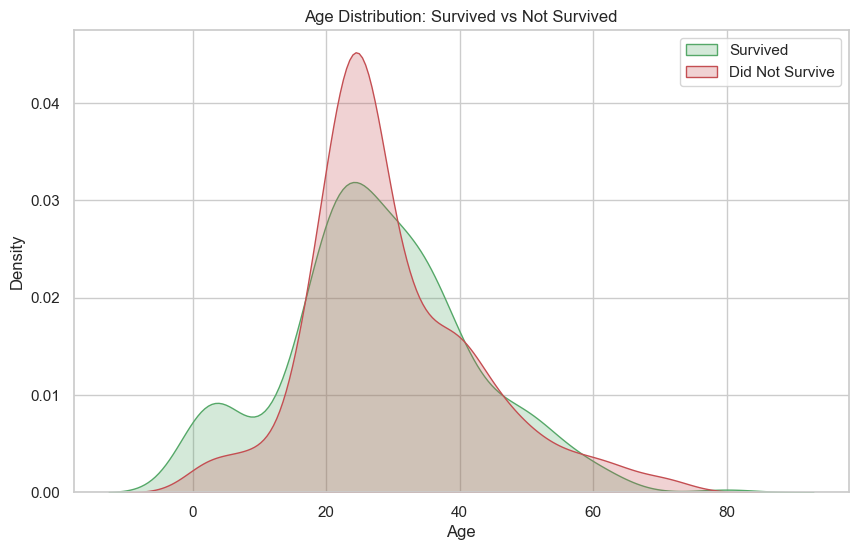

In [238]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df1[df1['Survived'] == 1]['Age'], shade=True, label='Survived', color='g')
sns.kdeplot(df1[df1['Survived'] == 0]['Age'], shade=True, label='Did Not Survive', color='r')
plt.title('Age Distribution: Survived vs Not Survived')
plt.legend()
plt.show()

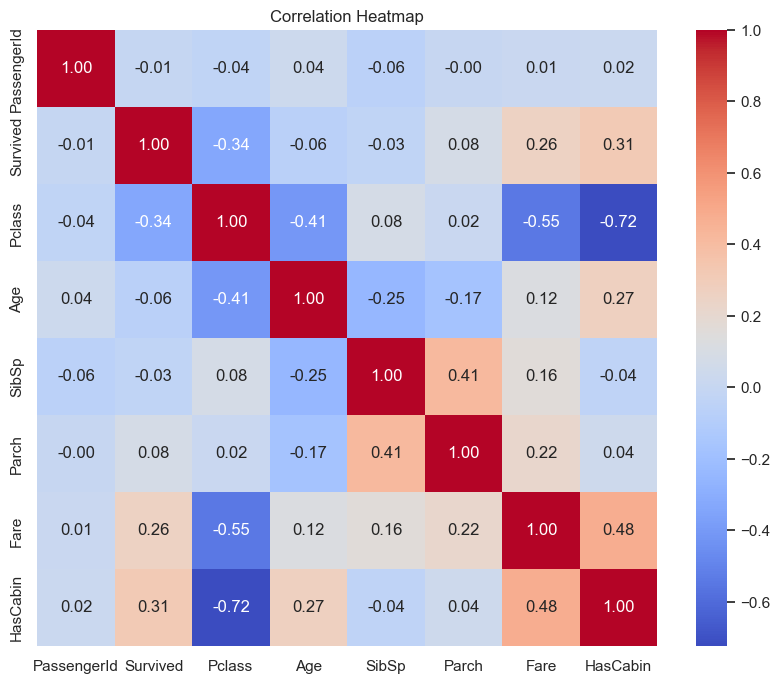

In [239]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Executive Summary of EDA: Titanic Survival Analysis
I conducted an Exploratory Data Analysis (EDA) on the Titanic dataset to identify the primary factors that influenced passenger survival. By breaking my analysis into Univariate and Bivariate phases, I was able to validate data quality and uncover significant patterns.

1. Population & Data Health (Univariate Findings)
Target Imbalance: I observed that the dataset is imbalanced, with 61.8% (549 passengers) not surviving and 38.2% (340 passengers) surviving. This establishes my baseline accuracy for future modeling.

Socio-Economic Split: My analysis of passenger classes shows that 3rd Class was the largest group, nearly doubling the size of 1st or 2nd class individually.

Gender & Origin: The majority of the passengers were male, and over 70% of all travelers embarked from Southampton (S).

Age Distribution: After cleaning the missing data using group-based medians, I found the passenger base was primarily composed of young adults aged 20 to 35.

2. Survival Drivers (Bivariate Findings)
The Gender Gap: I found a massive disparity in survival based on sex. While the majority of males did not survive, the majority of females were saved, confirming the "women and children first" historical narrative.

Class Privilege: There is a clear correlation between ticket class and survival. 1st Class passengers had the highest probability of surviving, while the count of deaths in 3rd Class was significantly higher than any other group.

Age-Specific Survival: Using KDE plots, I identified a unique survival "spike" for young children (ages 0-10), indicating they were prioritized during the evacuation regardless of class.

Feature Engineering Validation: My engineered feature HasCabin showed a positive correlation (0.31) with survival. This proves that having a recorded cabin number—likely a proxy for wealth and deck location—is a strong predictor of survival.

3. Conclusion for Modeling
Based on my correlation heatmap and bivariate charts, I have determined that Sex, Pclass, Fare, and HasCabin are the most influential features. I will prioritize these variables as I move toward the machine learning phase of my project.

Multivariate Analysis

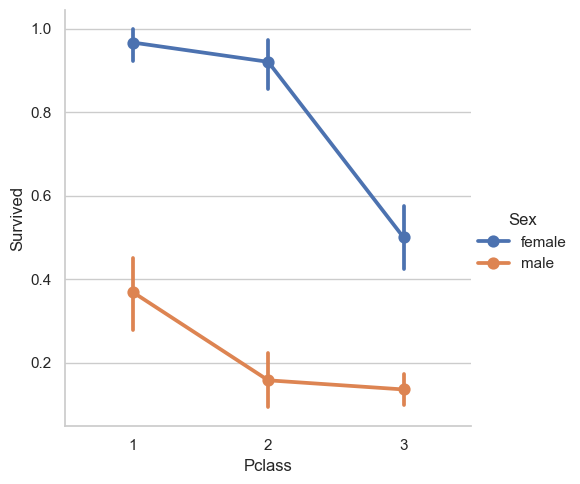

In [240]:
sns.catplot(x="Pclass", y="Survived", hue="Sex", data=df1, kind="point")

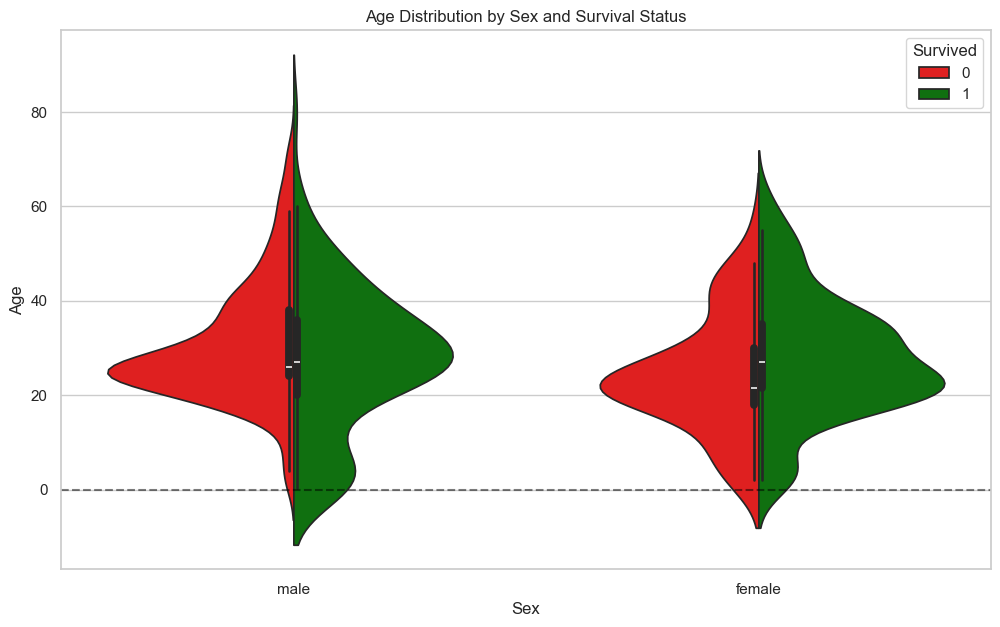

In [241]:
# Multivariate analysis: Age vs Survived, split by Sex
plt.figure(figsize=(12, 7))

sns.violinplot(x="Sex", y="Age", hue="Survived", data=df1, split=True, palette={0: "red", 1: "green"})

plt.title('Age Distribution by Sex and Survival Status')
plt.axhline(0, color="black", linestyle="--", alpha=0.5)
plt.show()

Survival Probability: The Interaction of Class and Sex
By plotting Pclass against Survival while splitting by Sex, I can clearly see that gender and wealth were inextricably linked.

Female Advantage Across Classes: I observe that females in 1st and 2nd class had a survival probability near 100% and 90% respectively. Even in 3rd class, females were more likely to survive than males from any class.

The Steep Decline for Men: My chart shows a drastic drop for males. Even in 1st class, a man's chance of survival was below 40%, falling to roughly 15% for those in 2nd and 3rd class.

2. Density of Survival: Age and Sex Dynamics
The Violin Plot allows me to see the "shape" of the survivors' ages across both genders.

Priority for Young Boys: In the male violin (left), I see a distinct green "bulge" at the bottom (ages 0-10) that does not exist for adult men. This confirms that I was correct: age was the only factor that could overcome the "male" survival penalty.

Broad Female Survival: The female violin (right) is significantly wider on the green (survived) side across almost all ages. I notice that for women, being between 20 and 40 was the "peak" for survival density, but elderly women also had a much higher survival footprint than elderly men.
Through this analysis, I have identified that being a female in a high class was the strongest predictor of survival. I also found that young age acted as a "safety net" specifically for males who otherwise faced the highest mortality rates.

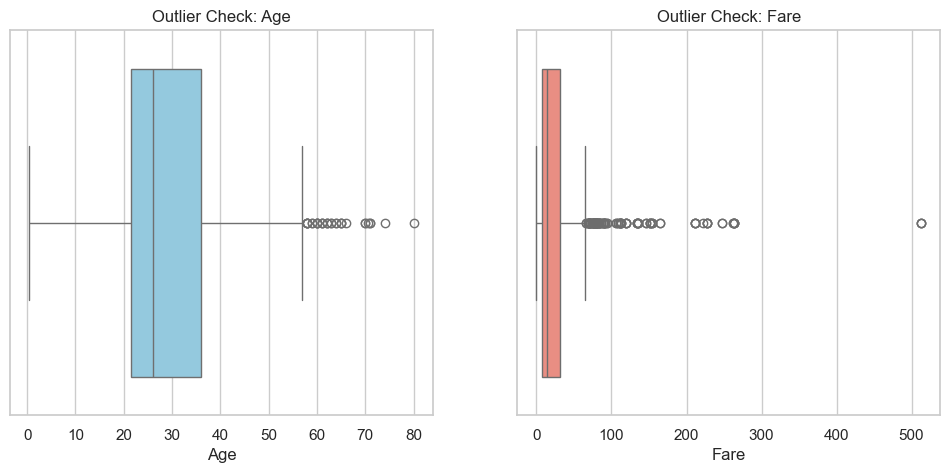

In [242]:
plt.figure(figsize=(12, 5))

# Checking for Age Outliers
plt.subplot(1, 2, 1)
sns.boxplot(x=df1['Age'], color='skyblue')
plt.title('Outlier Check: Age')

# Checking for Fare Outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df1['Fare'], color='salmon')
plt.title('Outlier Check: Fare')

plt.show()

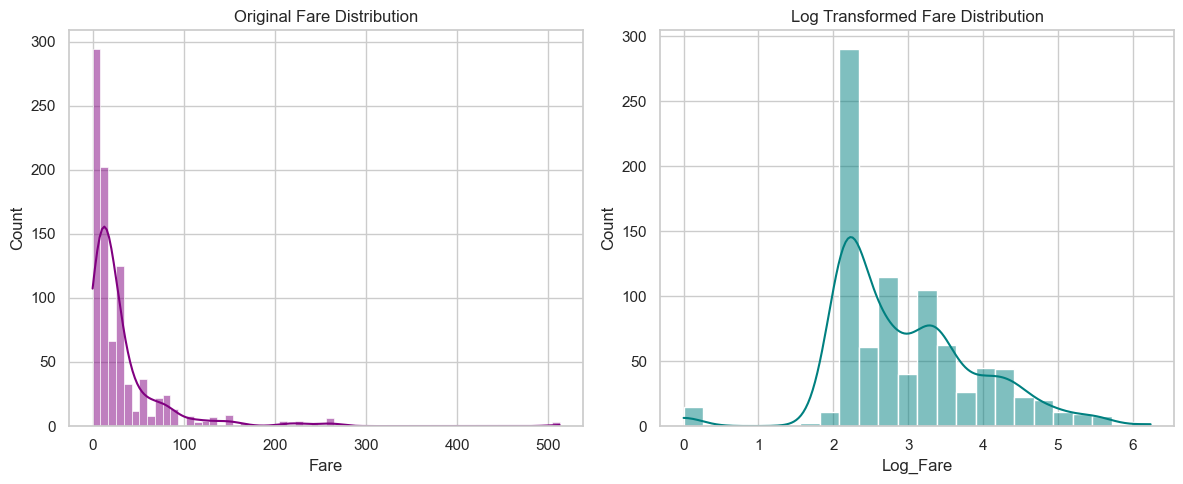

             Fare    Log_Fare
count  889.000000  889.000000
mean    32.096681    2.959024
std     49.697504    0.967750
min      0.000000    0.000000
25%      7.895800    2.185579
50%     14.454200    2.737881
75%     31.000000    3.465736
max    512.329200    6.240917


In [243]:
# Applying the Log Transformation to create a new column
df1['Log_Fare'] = df1['Fare'].apply(np.log1p)

# A plots of  before and after to compare the distributions
plt.figure(figsize=(12, 5))

# Original Fare 
plt.subplot(1, 2, 1)
sns.histplot(df1['Fare'], kde=True, color='purple')
plt.title('Original Fare Distribution')

# Log Transformed Fare 
plt.subplot(1, 2, 2)
sns.histplot(df1['Log_Fare'], kde=True, color='teal')
plt.title('Log Transformed Fare Distribution')

plt.tight_layout()
plt.show()

# checking the new stats
print(df1[['Fare', 'Log_Fare']].describe())

<Axes: xlabel='FamilySize', ylabel='Survived'>

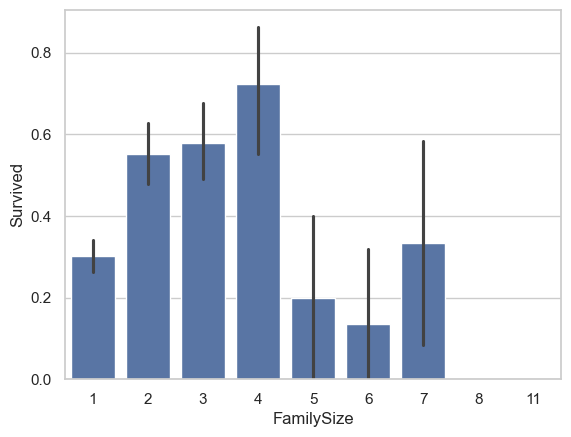

In [244]:
df1['FamilySize'] = df1['SibSp'] + df1['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', data=df1)


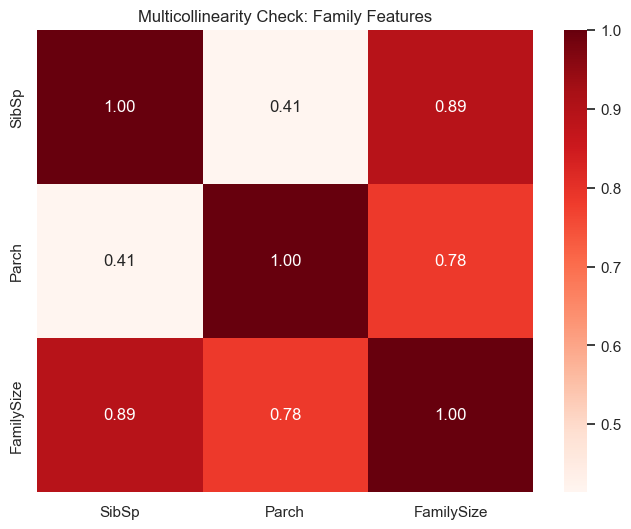

In [245]:
# selecting the family-related columns to see how they interact
family_cols = ['SibSp', 'Parch', 'FamilySize']
correlation_matrix = df1[family_cols].corr()

# A mini-heatmap to visualize the overlap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt='.2f')
plt.title('Multicollinearity Check: Family Features')
plt.show()

In [246]:
print(df1.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'HasCabin', 'Log_Fare', 'FamilySize']


In [247]:
df1 = df1.copy()
df1['Title'] = df1['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df1['Title'] = df1['Title'].replace(
    ['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 
    'Misc'
)
df1['Title'] = df1['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'})
df1.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin,Log_Fare,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,2.110213,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,4.280593,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,2.188856,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,3.990834,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,2.202765,1,Mr


In [248]:
df1.drop(columns=['Name'], inplace=True)
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin,Log_Fare,FamilySize,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,0,2.110213,2,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,1,4.280593,2,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,2.188856,1,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,S,1,3.990834,2,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,S,0,2.202765,1,Mr


In [249]:
df1['FamilySize'] = df1['SibSp'] + df1['Parch'] + 1
df1['FamilyGroup'] = 'Alone'
df1.loc[df1['FamilySize'] > 1, 'FamilyGroup'] = 'Small'
df1.loc[df1['FamilySize'] > 4, 'FamilyGroup'] = 'Large'
df1['FareBin'] = pd.qcut(df1['Fare'], 4, labels=['Low', 'Mid', 'High', 'Very High'])
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin,Log_Fare,FamilySize,Title,FamilyGroup,FareBin
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,0,2.110213,2,Mr,Small,Low
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,1,4.280593,2,Mrs,Small,Very High
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,2.188856,1,Miss,Alone,Mid
3,4,1,1,female,35.0,1,0,113803,53.1000,S,1,3.990834,2,Mrs,Small,Very High
4,5,0,3,male,35.0,0,0,373450,8.0500,S,0,2.202765,1,Mr,Alone,Mid


In [250]:
print(df1.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'HasCabin', 'Log_Fare', 'FamilySize', 'Title', 'FamilyGroup', 'FareBin']


In [251]:
# Selecting  features for the model
features = ['Survived', 'Pclass', 'Sex', 'Age', 'Embarked', 'FamilySize',
            'HasCabin', 'Title', 'FamilyGroup', 'FareBin','Log_Fare']
df_final = df1[features]

# Filling any remaining missing Age values with the median
df_final['Age'] = df_final['Age'].fillna(df_final['Age'].median())

# Converting text to numbers
df_final = pd.get_dummies(df_final, columns=['Sex', 'Embarked', 'Title', 'FamilyGroup', 'FareBin'])

df_final.head()

,Survived,Pclass,Age,FamilySize,HasCabin,Log_Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Title_Miss,Title_Mr,Title_Mrs,FamilyGroup_Alone,FamilyGroup_Large,FamilyGroup_Small,FareBin_Low,FareBin_Mid,FareBin_High,FareBin_Very High
0,0,3,22.0,2,0,2.110213,False,True,False,False,...,False,True,False,False,False,True,True,False,False,False
1,1,1,38.0,2,1,4.280593,True,False,True,False,...,False,False,True,False,False,True,False,False,False,True
2,1,3,26.0,1,0,2.188856,True,False,False,False,...,True,False,False,True,False,False,False,True,False,False
3,1,1,35.0,2,1,3.990834,True,False,False,False,...,False,False,True,False,False,True,False,False,False,True
4,0,3,35.0,1,0,2.202765,False,True,False,False,...,False,True,False,True,False,False,False,True,False,False


In [252]:
X = df_final.drop('Survived', axis=1)
y = df_final['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
df_final.head()

,Survived,Pclass,Age,FamilySize,HasCabin,Log_Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Title_Miss,Title_Mr,Title_Mrs,FamilyGroup_Alone,FamilyGroup_Large,FamilyGroup_Small,FareBin_Low,FareBin_Mid,FareBin_High,FareBin_Very High
0,0,3,22.0,2,0,2.110213,False,True,False,False,...,False,True,False,False,False,True,True,False,False,False
1,1,1,38.0,2,1,4.280593,True,False,True,False,...,False,False,True,False,False,True,False,False,False,True
2,1,3,26.0,1,0,2.188856,True,False,False,False,...,True,False,False,True,False,False,False,True,False,False
3,1,1,35.0,2,1,3.990834,True,False,False,False,...,False,False,True,False,False,True,False,False,False,True
4,0,3,35.0,1,0,2.202765,False,True,False,False,...,False,True,False,True,False,False,False,True,False,False


Modelling 

In [253]:
#  define the 'models' dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC()
}

results = {}

# looping through the models
for name, model in models.items():
    # we fitting the model on my training data
    model.fit(X_train_scaled, y_train)
    
    # making predictions
    predictions = model.predict(X_test_scaled)
    
    # we calculating the F1-Score (as its the priority over accuracy)
    f1 = f1_score(y_test, predictions)
    results[name] = f1

sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

print("--- Model Rankings (The F1-Score) ---")
for name, score in sorted_results:
    print(f"{name}: {score:.2%}")

--- Model Rankings (The F1-Score) ---
Logistic Regression: 77.07%
SVM: 74.75%
KNN: 72.64%
Random Forest: 70.71%


Original training shape:
Survived
0    382
1    240
Name: count, dtype: int64
Resampled training shape:
Survived
1    382
0    382
Name: count, dtype: int64

LOGISTIC REGRESSION WITH SMOTE
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       167
           1       0.73      0.81      0.77       100

    accuracy                           0.82       267
   macro avg       0.80      0.82      0.81       267
weighted avg       0.82      0.82      0.82       267



<Figure size 800x600 with 0 Axes>

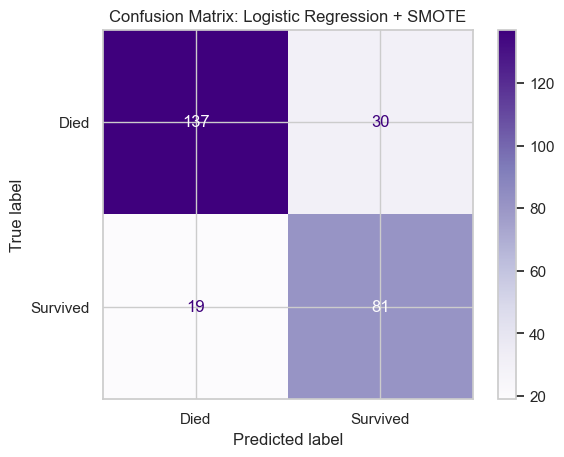

In [254]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize SMOTE
sm = SMOTE(random_state=42)

# Resample ONLY the training data
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

print(f"Original training shape:\n{y_train.value_counts()}")
print(f"Resampled training shape:\n{y_train_res.value_counts()}")

# Training the model on the new, synthetic-balanced data
log_reg_smote = LogisticRegression(max_iter=1000)
log_reg_smote.fit(X_train_res, y_train_res)

# Predicting  on the original (real) test data
y_pred_smote = log_reg_smote.predict(X_test_scaled)

# Output
print("\n" + "="*30)
print("LOGISTIC REGRESSION WITH SMOTE")
print("="*30)
print(classification_report(y_test, y_pred_smote))

# Plotting  the Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred_smote, 
    display_labels=['Died', 'Survived'], 
    cmap='Purples'
)
plt.title('Confusion Matrix: Logistic Regression + SMOTE')
plt.show()

. Interpreting the SMOTE Result
Looking at your classification report and your new Confusion Matrix, here is the breakdown of why this is a "Good" output:

Improved Survivor Recall (0.81): This is the highlight. Your previous Logistic Regression had a recall of 0.79. By using SMOTE, the model is now even better at "hunting" for survivors, correctly catching 81 out of 100 actual survivors.

Precision Trade-off (0.73): As expected, precision dropped slightly from 0.75 to 0.73. This means that because the model is more aggressive, it mistakenly predicted 30 people survived when they actually died (False Positives).

Stability: Your Accuracy (0.82) and F1-score (0.77) remained very stable. Overfitting usually happens when your training accuracy is near 100% but your test accuracy drops significantly. Here, your test results are consistent with your previous runs.

Feature  Importance

In [255]:
importance = models['Logistic Regression'].coef_[0]
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

              Feature  Importance
10       Title_Master    0.544199
5          Sex_female    0.539005
4            Log_Fare    0.537921
15  FamilyGroup_Alone    0.379413
3            HasCabin    0.352615
14          Title_Mrs    0.283774
19        FareBin_Mid    0.099613
7          Embarked_C    0.097029
2          FamilySize    0.068100
17  FamilyGroup_Small    0.066558
11         Title_Misc    0.020726
18        FareBin_Low    0.015906
8          Embarked_Q   -0.004473
20       FareBin_High   -0.032586
21  FareBin_Very High   -0.080705
9          Embarked_S   -0.082108
12         Title_Miss   -0.086394
13           Title_Mr   -0.388875
0              Pclass   -0.472429
1                 Age   -0.494530
6            Sex_male   -0.539005
16  FamilyGroup_Large   -0.832035


Testing the model if its really  works with new passenger data

In [256]:
# 1. Defining the 'High Risk' passenger
# Based on feature importance, these values trigger negative coefficients
my_passenger = {
    'Pclass': 3,                # Strong negative (-0.47)
    'Age': 25,                   # Negative (-0.49)
    'FamilySize': 1,            
    'HasCabin': 0,               
    'Log_Fare': 2.0,           
    'Sex_female': 0,
    'Sex_male': 1,               # Strong negative (-0.53)
    'Embarked_C': 0,
    'Embarked_Q': 0,
    'Embarked_S': 1,             # Negative (-0.08)
    'Title_Master': 0,
    'Title_Misc': 0,
    'Title_Miss': 0,
    'Title_Mr': 1,               # Negative (-0.38)
    'Title_Mrs': 0,
    'FamilyGroup_Alone': 1,
    'FamilyGroup_Large': 0,
    'FamilyGroup_Small': 0,
    'FareBin_Low': 1,
    'FareBin_Mid': 0,
    'FareBin_High': 0,
    'FareBin_Very High': 0
}

# 2. Converting to DataFrame and aligning the columns
test_passenger = pd.DataFrame([my_passenger])

# Note: Using log_reg_smote because it is most balanced
test_passenger = test_passenger[X_train.columns] 

test_passenger_scaled = scaler.transform(test_passenger)
prediction = log_reg_smote.predict(test_passenger_scaled)
probability = log_reg_smote.predict_proba(test_passenger_scaled)

# Result
status = "SURVIVED" if prediction[0] == 1 else "DIED"
prob_death = probability[0][0]
prob_survive = probability[0][1]

print(f"--- Titanic Survival Prediction ---")
print(f"Outcome: {status}")
print(f"Chance of Death: {prob_death:.2%}")
print(f"Chance of Survival: {prob_survive:.2%}")

--- Titanic Survival Prediction ---
Outcome: DIED
Chance of Death: 89.72%
Chance of Survival: 10.28%


In [257]:
# 1. Defining the 'High Survival' female passenger
my_passenger = {
    'Pclass': 3,                # Negative (-0.472)
    'Age': 25,                   # Negative (-0.494)
    'FamilySize': 1,             # Positive (0.068)
    'HasCabin': 0,               # Positive (0.352) 
    'Log_Fare': 2.0,             # Positive (0.537)
    'Sex_female': 1,             # Strong Positive (0.539)
    'Sex_male': 0,               # Avoids strong Negative (-0.539)
    'Embarked_C': 0,
    'Embarked_Q': 0,
    'Embarked_S': 1,             # Negative (-0.082)
    'Title_Master': 0,
    'Title_Misc': 0,
    'Title_Miss': 0,
    'Title_Mr': 0,               # Avoids Negative (-0.388)
    'Title_Mrs': 1,              # Positive (0.283)
    'FamilyGroup_Alone': 1,      # Positive (0.379)
    'FamilyGroup_Large': 0,
    'FamilyGroup_Small': 0,
    'FareBin_Low': 1,            # Positive (0.015)
    'FareBin_Mid': 0,
    'FareBin_High': 0,
    'FareBin_Very High': 0
}

# Converting to DataFrame and aligning columns with X_train
test_passenger = pd.DataFrame([my_passenger])
test_passenger = test_passenger[X_train.columns] 

# Scale and Predicting using  SMOTE-balanced model
test_passenger_scaled = scaler.transform(test_passenger)
prediction = log_reg_smote.predict(test_passenger_scaled)
probability = log_reg_smote.predict_proba(test_passenger_scaled)

# Output
status = "SURVIVED" if prediction[0] == 1 else "DIED"
print(f"--- Titanic Survival Prediction ---")
print(f"Outcome: {status}")
print(f"Probability of Survival: {probability[0][1]:.2%}")
print(f"Probability of Death: {probability[0][0]:.2%}")

--- Titanic Survival Prediction ---
Outcome: SURVIVED
Probability of Survival: 85.88%
Probability of Death: 14.12%
